In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [2]:
from pathlib import Path
csvpath = Path("../Project 2/Resources/BTC_USD.csv.csv")
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-01-01,BTC,29333.605121,28935.810981,29601.594898,28753.412314
2021-01-02,BTC,32154.167363,29353.640608,33064.673534,29012.927887
2021-01-03,BTC,33002.536427,32074.106611,34452.080337,31885.581619
2021-01-04,BTC,31431.612280,32788.583453,33358.399346,28154.110298
2021-01-05,BTC,34433.606514,31991.926865,34435.417475,29948.653628


In [3]:
print(len(df))

204


<AxesSubplot:xlabel='Date'>

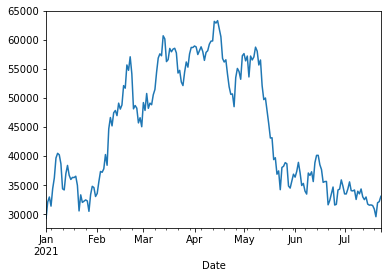

In [4]:
df["Closing Price (USD)"].plot()

<AxesSubplot:xlabel='Date'>

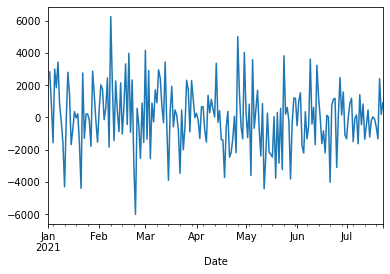

In [5]:
# Differencing the Settle price stationarizes the time series
df["Closing Price (USD)"].diff().plot()

# Autocorrelation and Partial Autocorrelation Analysis

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

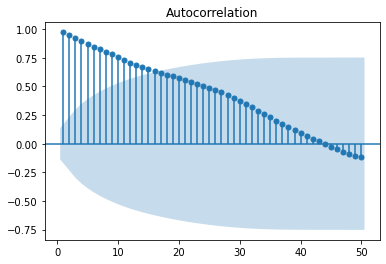

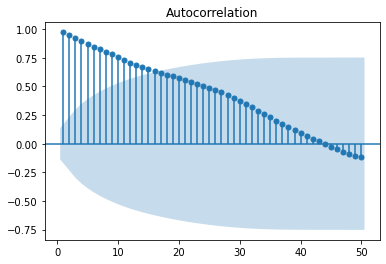

In [7]:
# Plot the autocorrelation of the Closing Prices
plot_acf(df["Closing Price (USD)"], zero=False, lags=50)

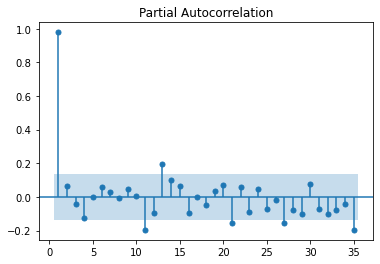

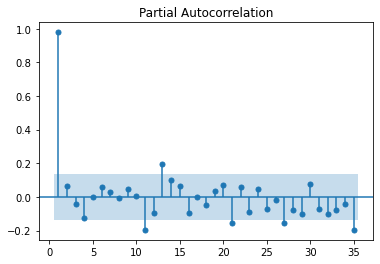

In [8]:
# Plot the partial autocorrelation of the returns
plot_pacf(df["Closing Price (USD)"], zero=False, lags=35)

# ARIMA Model

In [9]:
from statsmodels.tsa.arima_model import ARIMA

In [10]:
# Create an ARIMA model
model = ARIMA(df["Closing Price (USD)"].values, order=(1, 1, 1))

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [11]:
# Fit the model to the data
results = model.fit()

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [12]:
# Print the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  203
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1824.042
Method:                       css-mle   S.D. of innovations           1932.326
Date:                Sat, 31 Jul 2021   AIC                           3656.085
Time:                        13:23:59   BIC                           3669.337
Sample:                             1   HQIC                          3661.446
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.2328    130.810      0.139      0.889    -238.151     274.616
ar.L1.D.y     -0.5053      1.032     -0.490      0.624      -2.528       1.518
ma.L1.D.y      0.4516      1.068      0.423      0.672      -1.642       2.546
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9790           +0.0000j            1.9790            0.5000
MA.1           -2.2141           +0.0000j            2.2141            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Futures Forecast'}>

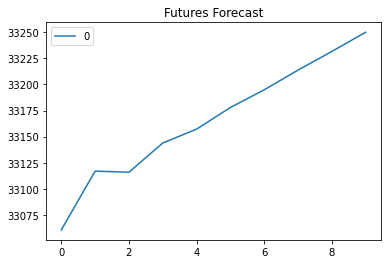

In [13]:
# Plot the Futures Price Forecast
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="Futures Forecast")

In [14]:
# save model
results.save('btc_model1.pkl')

# ARIMA Model using a Lag of 2

In [15]:
# Create an ARIMA Model and fit it to the data
model2 = ARIMA(df["Closing Price (USD)"].values, order=(2, 2, 1))
results2 = model2.fit()

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mode

In [16]:
# print the model summary
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  202
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -1816.632
Method:                       css-mle   S.D. of innovations           1921.933
Date:                Sat, 31 Jul 2021   AIC                           3643.264
Time:                        13:24:00   BIC                           3659.805
Sample:                             2   HQIC                          3649.956
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8523      2.274     -1.694      0.090      -8.309       0.604
ar.L1.D2.y    -0.0577      0.071     -0.817      0.414      -0.196       0.081
ar.L2.D2.y     0.0459      0.071      0.650      0.515      -0.092       0.184
ma.L1.D2.y    -0.9999      0.015    -65.187      0.000      -1.030      -0.970
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.0815           +0.0000j            4.0815            0.5000
AR.2            5.3396           +0.0000j            5.3396            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Futures Forecast'}>

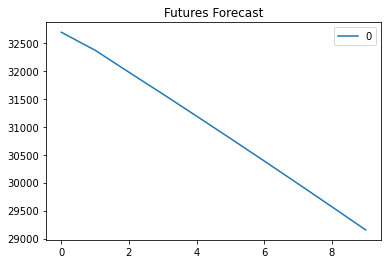

In [17]:
# Plot the Futures Price Forecast
pd.DataFrame(results2.forecast(steps=10)[0]).plot(title="Futures Forecast")

In [18]:
# save model
results2.save('btc_model2.pkl')

# SARIMAX

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [20]:
# Create an SARIMA model
sari_model = SARIMAX(df["Closing Price (USD)"], order=(1, 1, 1), seasonal_order=(1,1,0, 5))

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [21]:
# fit model
sari_model_fit = sari_model.fit()

In [22]:
# one step forecast
yhat = sari_model_fit.forecast()

In [23]:
sari_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                Closing Price (USD)   No. Observations:                  204
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 5)   Log Likelihood               -1833.135
Date:                            Sat, 31 Jul 2021   AIC                           3674.270
Time:                                    13:24:00   BIC                           3687.423
Sample:                                01-01-2021   HQIC                          3679.594
                                     - 07-23-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6648      4.385      0.152      0.880      -7.930       9.260
ma.L1         -0.6578      4.416     -0.149      0.882      -9.312       7.996
ar.S.L5       -0.3448      0.022    -16.010      0.000      -0.387      -0.303
sigma2      6.249e+06   8.08e-06   7.73e+11      0.000    6.25e+06    6.25e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):               142.36
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                            -0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
new_df = df.rename(columns={'Closing Price (USD)':'Close'})

In [25]:
new_df = new_df.drop(columns={'Currency', '24h Open (USD)', '24h High (USD)', '24h Low (USD)'})

In [26]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(new_df.Close, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.5225890227085421
2. P-Value :  0.5223087541803849
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 203
5. Critical Values :
	 1% :  -3.462980134086401
	 5% :  -2.875885461947131
	 10% :  -2.5744164898444515


In [27]:
rolling_mean = new_df.rolling(window = 12).mean()

In [28]:
rolling_mean = rolling_mean.dropna()

In [29]:
rolling_mean

,Close
Date,
2021-01-12,35371.431876
2021-01-13,36011.715408
2021-01-14,36535.190087
2021-01-15,36847.610799
2021-01-16,37229.708076
...,...
2021-07-19,32548.350774
2021-07-20,32300.761555
2021-07-21,32135.741476


<ipython-input-30-8bc788f747a6>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = plt.subplot()


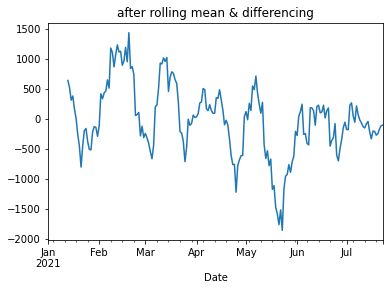

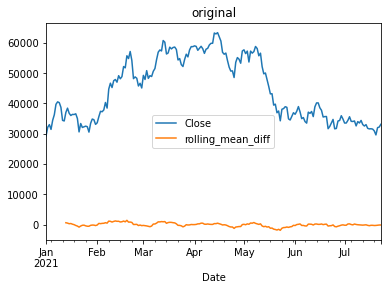

In [30]:
new_df['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
new_df['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
new_df.plot(title='original');

In [31]:
dftest2 = adfuller(new_df['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest2[0])
print("2. P-Value : ", dftest2[1])
print("3. Num Of Lags : ", dftest2[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest2[3])
print("5. Critical Values :")
for key, val in dftest2[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.4501166346754806
2. P-Value :  0.12808785095848874
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 179
5. Critical Values :
	 1% :  -3.4674201432469816
	 5% :  -2.877826051844538
	 10% :  -2.575452082332012


In [32]:
new_df

,Close,rolling_mean_diff
Date,,
2021-01-01,29333.605121,NaN
2021-01-02,32154.167363,NaN
2021-01-03,33002.536427,NaN
2021-01-04,31431.612280,NaN
2021-01-05,34433.606514,NaN
...,...,...
2021-07-19,30940.287284,-272.183937
2021-07-20,29608.597253,-247.589219
2021-07-21,32014.436034,-165.020080


In [37]:
# Create an ARIMA Model and fit it to the data
model3 = ARIMA(new_df["Close"], order=(1, 1, 1))
results3 = model3.fit()

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D

In [38]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  203
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1824.042
Method:                       css-mle   S.D. of innovations           1932.326
Date:                Sat, 31 Jul 2021   AIC                           3656.085
Time:                        13:25:40   BIC                           3669.337
Sample:                    01-02-2021   HQIC                          3661.446
                         - 07-23-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            18.2328    130.810      0.139      0.889    -238.151     274.616
ar.L1.D.Close    -0.5053      1.032     -0.490      0.624      -2.528       1.518
ma.L1.D.Close     0.4516      1.068      0.423      0.672      -1.642       2.546
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9790           +0.0000j            1.9790            0.5000
MA.1           -2.2141           +0.0000j            2.2141            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Date'>

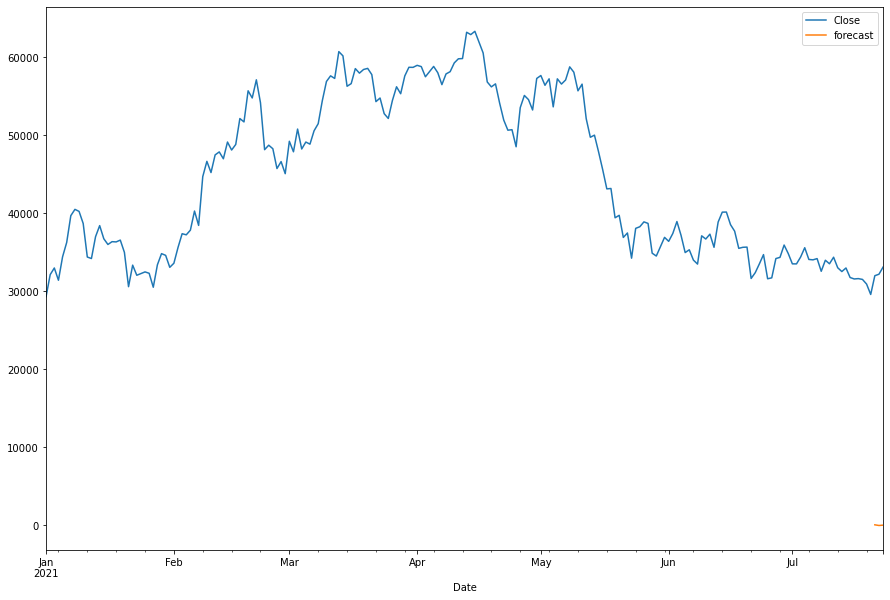

In [42]:
new_df['forecast']=results3.predict(start=201,end=220,dynamic=True)
new_df[['Close','forecast']].plot(figsize=(15,10))

In [43]:
model4=ARIMA(new_df['rolling_mean_diff'].dropna(),order=(1,1,1))
model_fit=model4.fit()

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D

<AxesSubplot:xlabel='Date'>

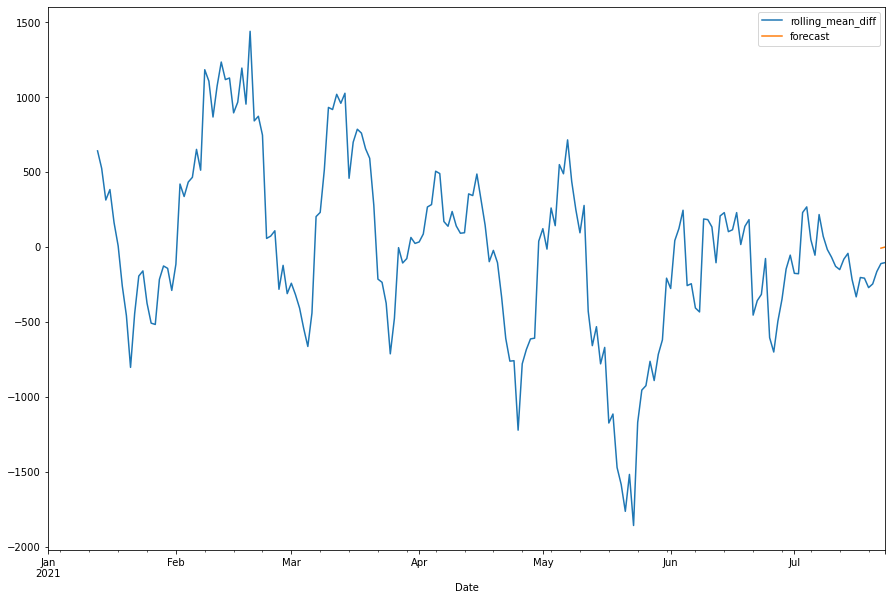

In [68]:
new_df['forecast']=model_fit.predict(start=190,end=225,dynamic=True)
new_df[['rolling_mean_diff','forecast']].plot(figsize=(15,10))

In [69]:
import statsmodels.api as sm

In [73]:
saridf = df.drop(columns={'Currency', '24h Open (USD)', '24h High (USD)', '24h Low (USD)'})
saridf = saridf.rename(columns={'Closing Price (USD)':'Close'})

In [81]:
model5=sm.tsa.statespace.SARIMAX(saridf['Close'],order=(1, 1, 1),seasonal_order=(1,1,1,8))
results5=model5.fit()

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Date'>

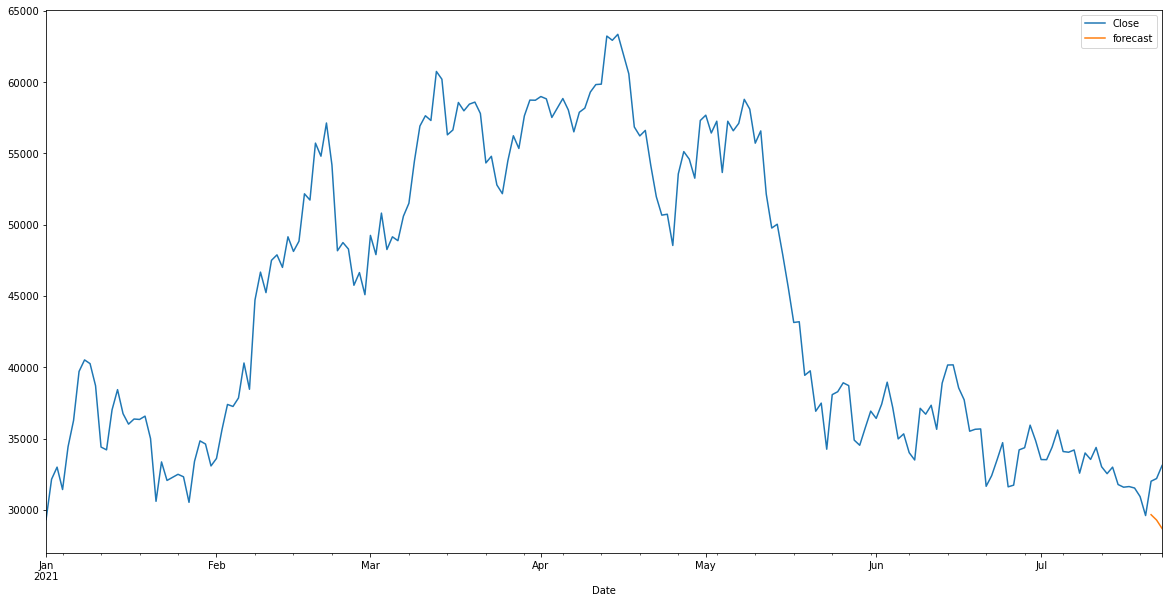

In [82]:
saridf['forecast']=results5.predict(start=201,end=215,dynamic=True)
saridf[['Close','forecast']].plot(figsize=(20,10))

In [80]:
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  204
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1750.356
Date:                            Sat, 31 Jul 2021   AIC                           3510.712
Time:                                    13:36:08   BIC                           3526.974
Sample:                                01-01-2021   HQIC                          3517.299
                                     - 07-23-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9999      1.736     -0.576      0.565      -4.403       2.403
ma.L1          0.9998      1.822      0.549      0.583      -2.571       4.571
ar.S.L12       0.0435      0.045      0.967      0.333      -0.045       0.132
ma.S.L12      -0.7818      0.058    -13.376      0.000      -0.896      -0.667
sigma2      5.064e+06   1.24e-05   4.08e+11      0.000    5.06e+06    5.06e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):                11.86
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.21e+26. Standard errors may be unstable.
"""